In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hw_visualization/player_data.csv').dropna()
print(df.shape)

(4213, 8)


In [3]:
df.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

Если посмотреть на данные, что есть в этом наборе данных, то можна предположить, что какие-то выводы можно будет извлечь из всех данных, кроме имени и колледжа.
Преобразуем наш набор данных, для этого нужно:
- выбросить столбец "name", "college";
- столбец "height", который записан в футах и дюймах, перевести в сантиметры (1 фут = 30.48 сантиметров, 1 дюйм = 2.54 сантиметра); 
- столбец "weight", который записан в фунтах, перевести в килограммы (1 киллограмм = 1 фунт/2.2046);
- из столбца "birth_date" полезный для нас будет только год рождения.

In [4]:
df = df.drop(['name', 'college'], axis = 1)

In [5]:
df['height'] = [int(item[:1]) * 30.48 + int(item[2:]) * 2.54 for item in df['height'].values]

In [6]:
df['weight'] = [round(int(item) / 2.2046, 2) for item in df['weight'].values]

In [7]:
df['birth_date'] = [int(item[-4:]) for item in df['birth_date'].values]

In [8]:
df.head()

year_start  year_end position  height  weight  birth_date
0        1991      1995      F-C  208.28  108.86        1968
1        1969      1978      C-F  205.74  106.60        1946
2        1970      1989        C  218.44  102.06        1947
3        1991      2001        G  185.42   73.48        1969
4        1998      2003        F  198.12  101.15        1974

Преобразование сделано. Теперь можно начинать строить графики.
Сначала я хочу посмотреть, как зависит позиция игрока от роста или веса. Для этого я сделаю кое-какие преобразования.

In [9]:
height = [140, 170, 180, 190, 200, 240]

In [10]:
df_height = df.copy()
df_height['height'] = np.digitize(df['height'].values, height)

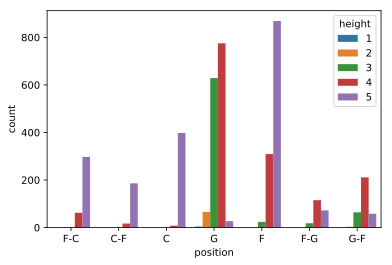

In [11]:
sns.countplot(x = 'position', hue = 'height', data = df_height)

Как видно из этого графика в этом наборе данных очень мало людей в категории ниже 170 см и они занимают позицию G. Людей от 170 до 180 тоже мало и они занимают только позицию G. Людей с ростом от 180 см до 190 см мало в позициях F, F-G, G-F, но в позиции G очень много. Так же видно , что люди с ростом от 190 см до 200 см есть в каждой позиции. Наибольшее их количество так же в позииции G.  Людей ростом выше 200 см в позиции G не мало. Наибольшее их количетсво в категории F, но в других категориях они так же присутствуют.

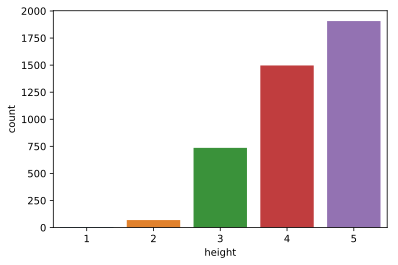

In [12]:
sns.countplot(x = 'height', data = df_height)

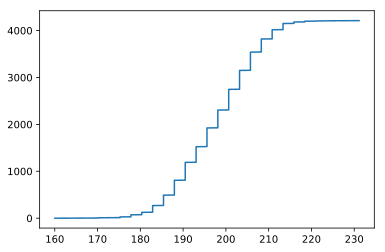

In [13]:
plt.plot(df['height'].sort_values(), range(df.shape[0]))

Ну, в принципе всё ожидаемо. С графиков, что приведены выше видно, что в этом наборе данных наибольше людей с ростом выше 200 см. А вот тех, кто ниже 170 см так мало, что их даже не видно. Cредний рост приблизительно 200 см. Теперь построим те же графики, что бы понять, как влияет на позицию вес. 

In [14]:
weight = [60, 80, 90, 100, 140, 180]

In [15]:
df_weight = df.copy()
df_weight['weight'] = np.digitize(df['weight'].values, weight)

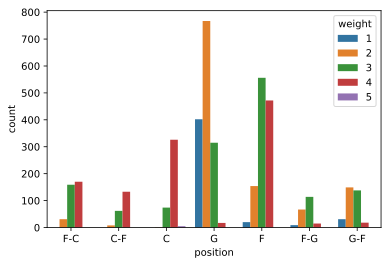

In [16]:
sns.countplot(x = 'position', hue = 'weight', data = df_weight)

Итак, посмотрев на график видно, что у нас мало людей с весом меньше 80 кг и наибольшая их доля занимает позицию G. Людей с весом от 80 дло 90 кг не мало, но их наибольшая часть занимает ту же позицию. Людей с весом от 90 до 100 кг и от 100 до 140 приблизительно однаковое количество. В то время как людей с весом больше 140 почти нету. Так же видно, что люди с 3 и 4 категории есть в каждой позиции, но наибольшее их количество в позиции F. 

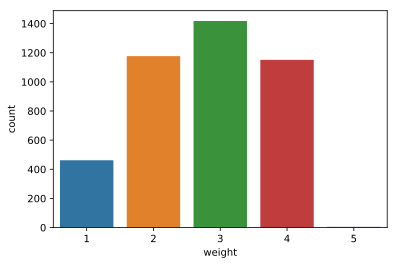

In [17]:
sns.countplot(x = 'weight', data = df_weight)

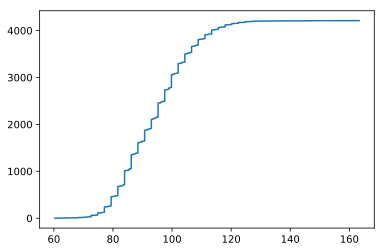

In [18]:
plt.plot(df['weight'].sort_values(), range(df.shape[0]))

C графиков, что были приведены выше видно, что такие людей с весом менее 80 кг или более 140 таки очень мало. И что наибольше людей в весовой категории от 90 до 100 кг. Средний вес примерно 100 кг. 
Со всех графиков, что были построины можно сделать вывод, что наибольшее количество людей в позиции G, F, а в позиции C-F, F-G будет наименьшее. Построим ещё один график, что бы посмотреть насколько правильны эти предположения.

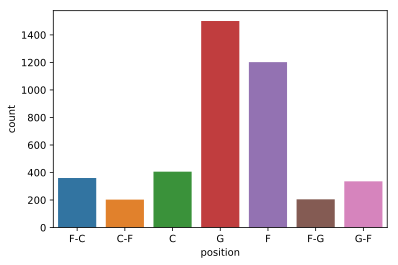

In [19]:
sns.countplot(x = 'position', data=df)

Да, все предположения подтвердились. 

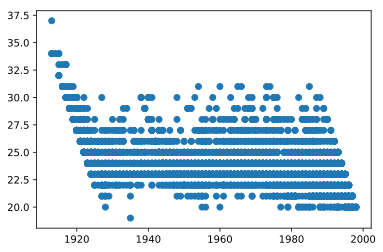

In [20]:
plt.scatter(df['birth_date'], df['year_start']-df['birth_date'])

З данного графика видно, что наибольшее количество людей приходит в спорт в возрасте приблизительно от 22 лет и приблизительно к 26.

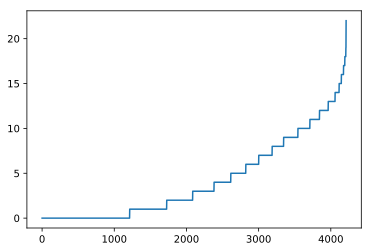

In [21]:
plt.plot(range(df.shape[0]), (df['year_end']-df['year_start']).sort_values())

С этого графика видно, что у наборе данных много людей, которые не пробыли в сфере спорта и года. Основная масса людей проработала до 15 лет в этой сфере. 

Так же я хотела посмотреть зависимы ли линейно признаки роста и веса.

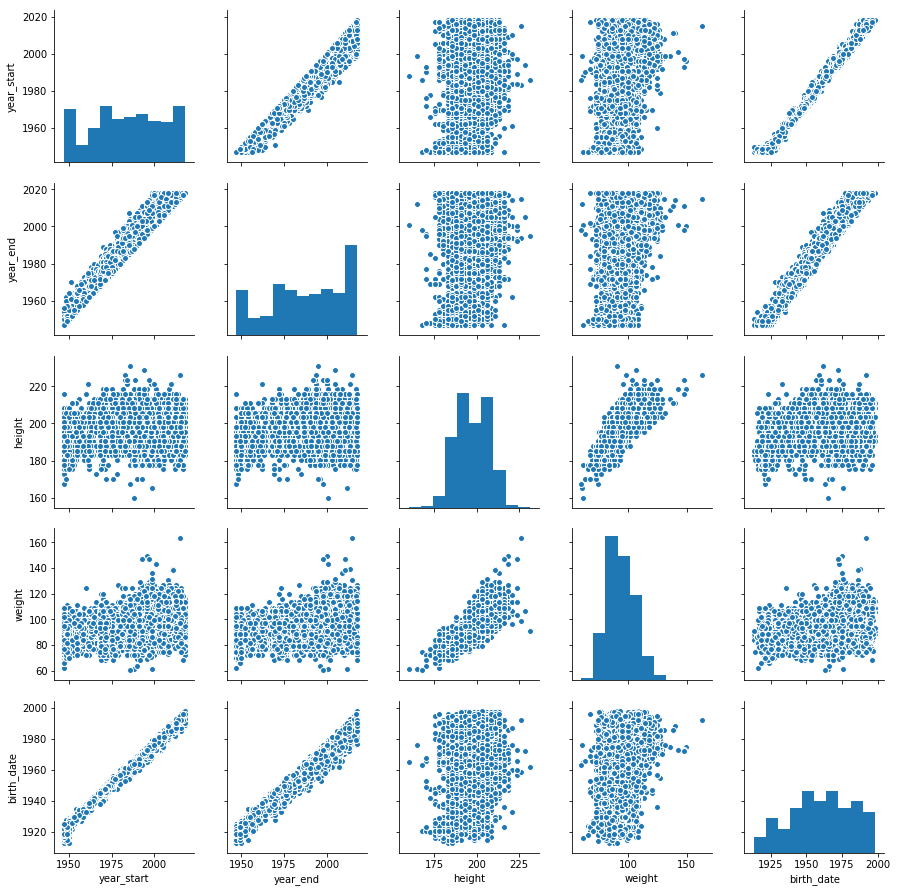

In [22]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['year_start', 'year_end', 'height', 
                 'weight', 'birth_date']]);

Есть ещё один способ посмотреть зависимы ли линейно некоторые признаки.

In [23]:
corr_matrix = df.drop('position', axis=1).corr()

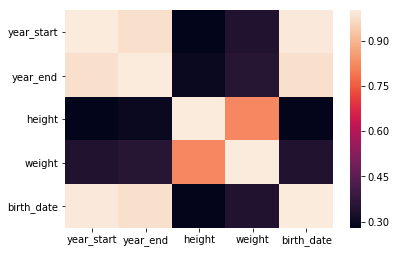

In [24]:
sns.heatmap(corr_matrix);

Мои предположения подтвердились. Так же я вижу, что между собой сильно коррелируют колонки year_start, year_end, birth_date. Это означает, что можно было оставить какую-то из этих колонок, если бы количество признаков было слишком большое, потом что они несут мало смысловой нагрузки.

Теперь можно загрузить и проанализировать следующий набор данных. Набор данных Players имеет колонки "name", "height", "weight", "college", "born_city", "born_state". Я думаю, что из этих данных мы не можем извлечь новую информацию. По-этому загружаю набор данных Seasons_Stats

In [25]:
df = pd.read_csv('hw_visualization/Seasons_Stats.csv').dropna()
print(df.shape)

(0, 53)


По всей видимости в наборе данных каждая строка имеет пропущенные значения. Предлагаю посмотреть на него, не выбрасывая строки.

In [26]:
df = pd.read_csv('hw_visualization/Seasons_Stats.csv')
df.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...      FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...    0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...    0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...    0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...    0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...    0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

Первое, что я заметила, что в наборе данных очень много признаков. И так же заметно, что мы имеем набор данных с огромным количеством пропущенных значений. Посмотрим, какого типа данные должны хранится в наших столбцах.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

Видно, что почти все данные вещественного типа. Я думаю, что вместо того, что бы выбрасывать строки с пропущенными значениями можно поменять пропущенные значения на 0.

In [28]:
df = df.fillna(0)

In [29]:
df.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G   GS   MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0  0.0  0.0  0.0   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0  0.0  0.0  0.0   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0  0.0  0.0  0.0   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0  0.0  0.0  0.0   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0  0.0  0.0  0.0   

   ...      FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...    0.705  0.0  0.0  0.0  176.0  0.0  0.0  0.0  217.0  458.0  
1  ...    0.708  0.0  0.0  0.0  109.0  0.0  0.0  0.0   99.0  279.0  
2  ...    0.698  0.0  0.0  0.0  140.0  0.0  0.0  0.0  192.0  438.0  
3  ...    0.559  0.0  0.0  0.0   20.0  0.0  0.0  0.0   29.0   63.0  
4  ...    0.548  0.0  0.0  0.0   20.0  0.0  0.0  0.0   27.0   59.0  

[5 rows x 53 columns]

Значит, пропущенные значения мы убрали. Теперь можно разобраться с количеством признаков. Сначала нужно изменить категориальные признаки. Столбец Player я думаю не несёт в себе никакой информационной нагрузки, его мы выбросим (так же я думаю нужно выбросить первый столбец в нашем наборе данных Unnamed:0). А вот столбцы Pos, Tm я думаю можно перевести в вещественные. Затем построим heatmap, что бы посмотреть какие признаки можно выбросить. 

In [30]:
df = df.drop(['Player'], axis = 1)

In [31]:
df = df.drop(df.columns[0], axis = 1)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
le.fit(list(df.Tm.values));

In [35]:
Teams = le.classes_

In [36]:
df['Tm'] = le.transform(list(df.Tm.values))
df.head()

Year  Pos   Age  Tm     G   GS   MP  PER    TS%  3PAr  ...      FT%  ORB  \
0  1950.0  G-F  31.0  22  63.0  0.0  0.0  0.0  0.368   0.0  ...    0.705  0.0   
1  1950.0   SG  29.0  26  49.0  0.0  0.0  0.0  0.435   0.0  ...    0.708  0.0   
2  1950.0   SF  25.0  14  67.0  0.0  0.0  0.0  0.394   0.0  ...    0.698  0.0   
3  1950.0    F  24.0  62  15.0  0.0  0.0  0.0  0.312   0.0  ...    0.559  0.0   
4  1950.0    F  24.0  21  13.0  0.0  0.0  0.0  0.308   0.0  ...    0.548  0.0   

   DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  0.0  0.0  176.0  0.0  0.0  0.0  217.0  458.0  
1  0.0  0.0  109.0  0.0  0.0  0.0   99.0  279.0  
2  0.0  0.0  140.0  0.0  0.0  0.0  192.0  438.0  
3  0.0  0.0   20.0  0.0  0.0  0.0   29.0   63.0  
4  0.0  0.0   20.0  0.0  0.0  0.0   27.0   59.0  

[5 rows x 51 columns]

Всё сработало, прекрасно. Я специально сохранила названия комманд, что бы их можно было использовать для дальнейшего анализа данных. К примеру:

In [37]:
print(Teams)

['0' 'AND' 'ATL' 'BAL' 'BLB' 'BOS' 'BRK' 'BUF' 'CAP' 'CHA' 'CHH' 'CHI'
 'CHO' 'CHP' 'CHS' 'CHZ' 'CIN' 'CLE' 'DAL' 'DEN' 'DET' 'DNN' 'FTW' 'GSW'
 'HOU' 'IND' 'INO' 'KCK' 'KCO' 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'MLH'
 'MNL' 'NJN' 'NOH' 'NOJ' 'NOK' 'NOP' 'NYK' 'NYN' 'OKC' 'ORL' 'PHI' 'PHO'
 'PHW' 'POR' 'ROC' 'SAC' 'SAS' 'SDC' 'SDR' 'SEA' 'SFW' 'SHE' 'STB' 'STL'
 'SYR' 'TOR' 'TOT' 'TRI' 'UTA' 'VAN' 'WAS' 'WAT' 'WSB' 'WSC']


In [38]:
df[df['Tm'] == 1].head()

Year  Pos   Age  Tm     G   GS   MP  PER    TS%  3PAr   ...      FT%  \
10  1950.0  F-C  28.0   1  29.0  0.0  0.0  0.0  0.326   0.0   ...    0.688   
19  1950.0    G  26.0   1  64.0  0.0  0.0  0.0  0.415   0.0   ...    0.824   
31  1950.0  F-C  25.0   1  11.0  0.0  0.0  0.0  0.454   0.0   ...    0.667   
37  1950.0   SF  28.0   1  64.0  0.0  0.0  0.0  0.372   0.0   ...    0.718   
73  1950.0    G  29.0   1  64.0  0.0  0.0  0.0  0.322   0.0   ...    0.622   

    ORB  DRB  TRB    AST  STL  BLK  TOV     PF     PTS  
10  0.0  0.0  0.0   88.0  0.0  0.0  0.0  133.0   279.0  
19  0.0  0.0  0.0  189.0  0.0  0.0  0.0  192.0  1138.0  
31  0.0  0.0  0.0    8.0  0.0  0.0  0.0   32.0    38.0  
37  0.0  0.0  0.0  160.0  0.0  0.0  0.0  190.0   752.0  
73  0.0  0.0  0.0   91.0  0.0  0.0  0.0  147.0   287.0  

[5 rows x 51 columns]

В данном случае я показала только тех людей, которые играли в команде AND.

Переходим к преобразованию следующего столбца.

In [39]:
le.fit(list(df.Pos.values))
Position = le.classes_
df['Pos'] = le.transform(list(df.Pos.values))
df.head()

Year  Pos   Age  Tm     G   GS   MP  PER    TS%  3PAr  ...      FT%  ORB  \
0  1950.0    9  31.0  22  63.0  0.0  0.0  0.0  0.368   0.0  ...    0.705  0.0   
1  1950.0   20  29.0  26  49.0  0.0  0.0  0.0  0.435   0.0  ...    0.708  0.0   
2  1950.0   16  25.0  14  67.0  0.0  0.0  0.0  0.394   0.0  ...    0.698  0.0   
3  1950.0    5  24.0  62  15.0  0.0  0.0  0.0  0.312   0.0  ...    0.559  0.0   
4  1950.0    5  24.0  21  13.0  0.0  0.0  0.0  0.308   0.0  ...    0.548  0.0   

   DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  0.0  0.0  176.0  0.0  0.0  0.0  217.0  458.0  
1  0.0  0.0  109.0  0.0  0.0  0.0   99.0  279.0  
2  0.0  0.0  140.0  0.0  0.0  0.0  192.0  438.0  
3  0.0  0.0   20.0  0.0  0.0  0.0   29.0   63.0  
4  0.0  0.0   20.0  0.0  0.0  0.0   27.0   59.0  

[5 rows x 51 columns]

Строим корреляционную матрицу между всеми нашими признаками.

In [40]:
corr_matrix = df.corr()

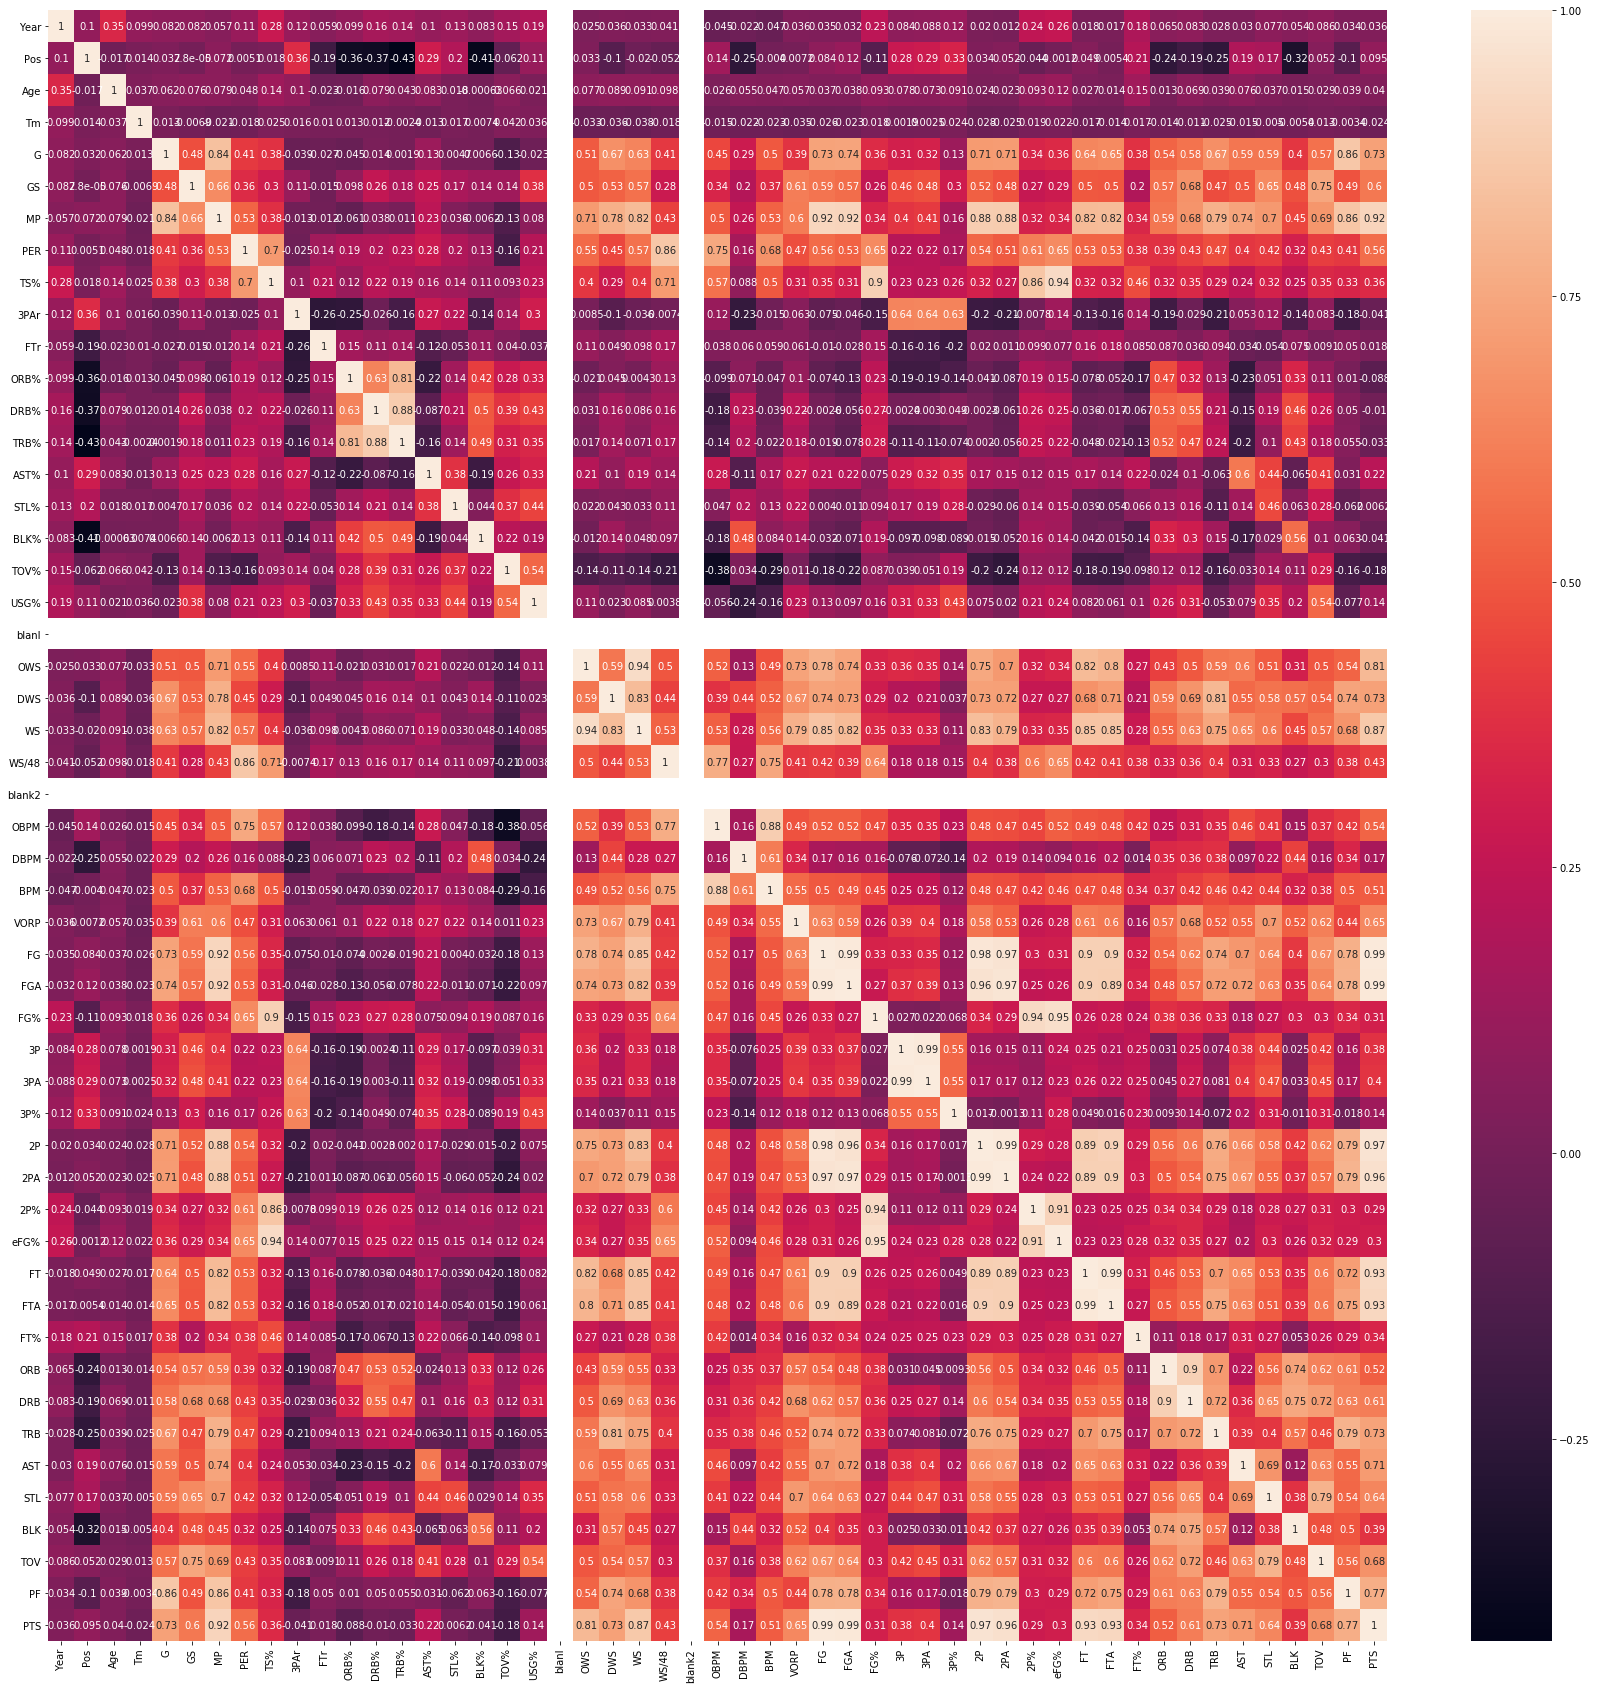

In [41]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr_matrix, annot=True)

Видно плохо, но всё равно заметно, что у нас много признаков, которые коррелируют. Попробуем убрать лишние.

In [42]:
df = df.drop([
    'blanl', 'blank2', 'MP', 'FG', '3P', '2P', 'FT', 'PF', 
    'FGA', '2PA', 'TOV', 'WS/48', 'FG%', '2P%', 'eFG%', 'TRB%',
    'VORP', 'FTA', 'PTS', 'WS', 'TRB', 'OBPM', 'TS%', 'BLK',
    'DWS', 'BPM', '3P%', '3PA', 'AST', 'STL', 'DRB'
    ], axis = 1)

In [43]:
corr_matrix = df.corr()

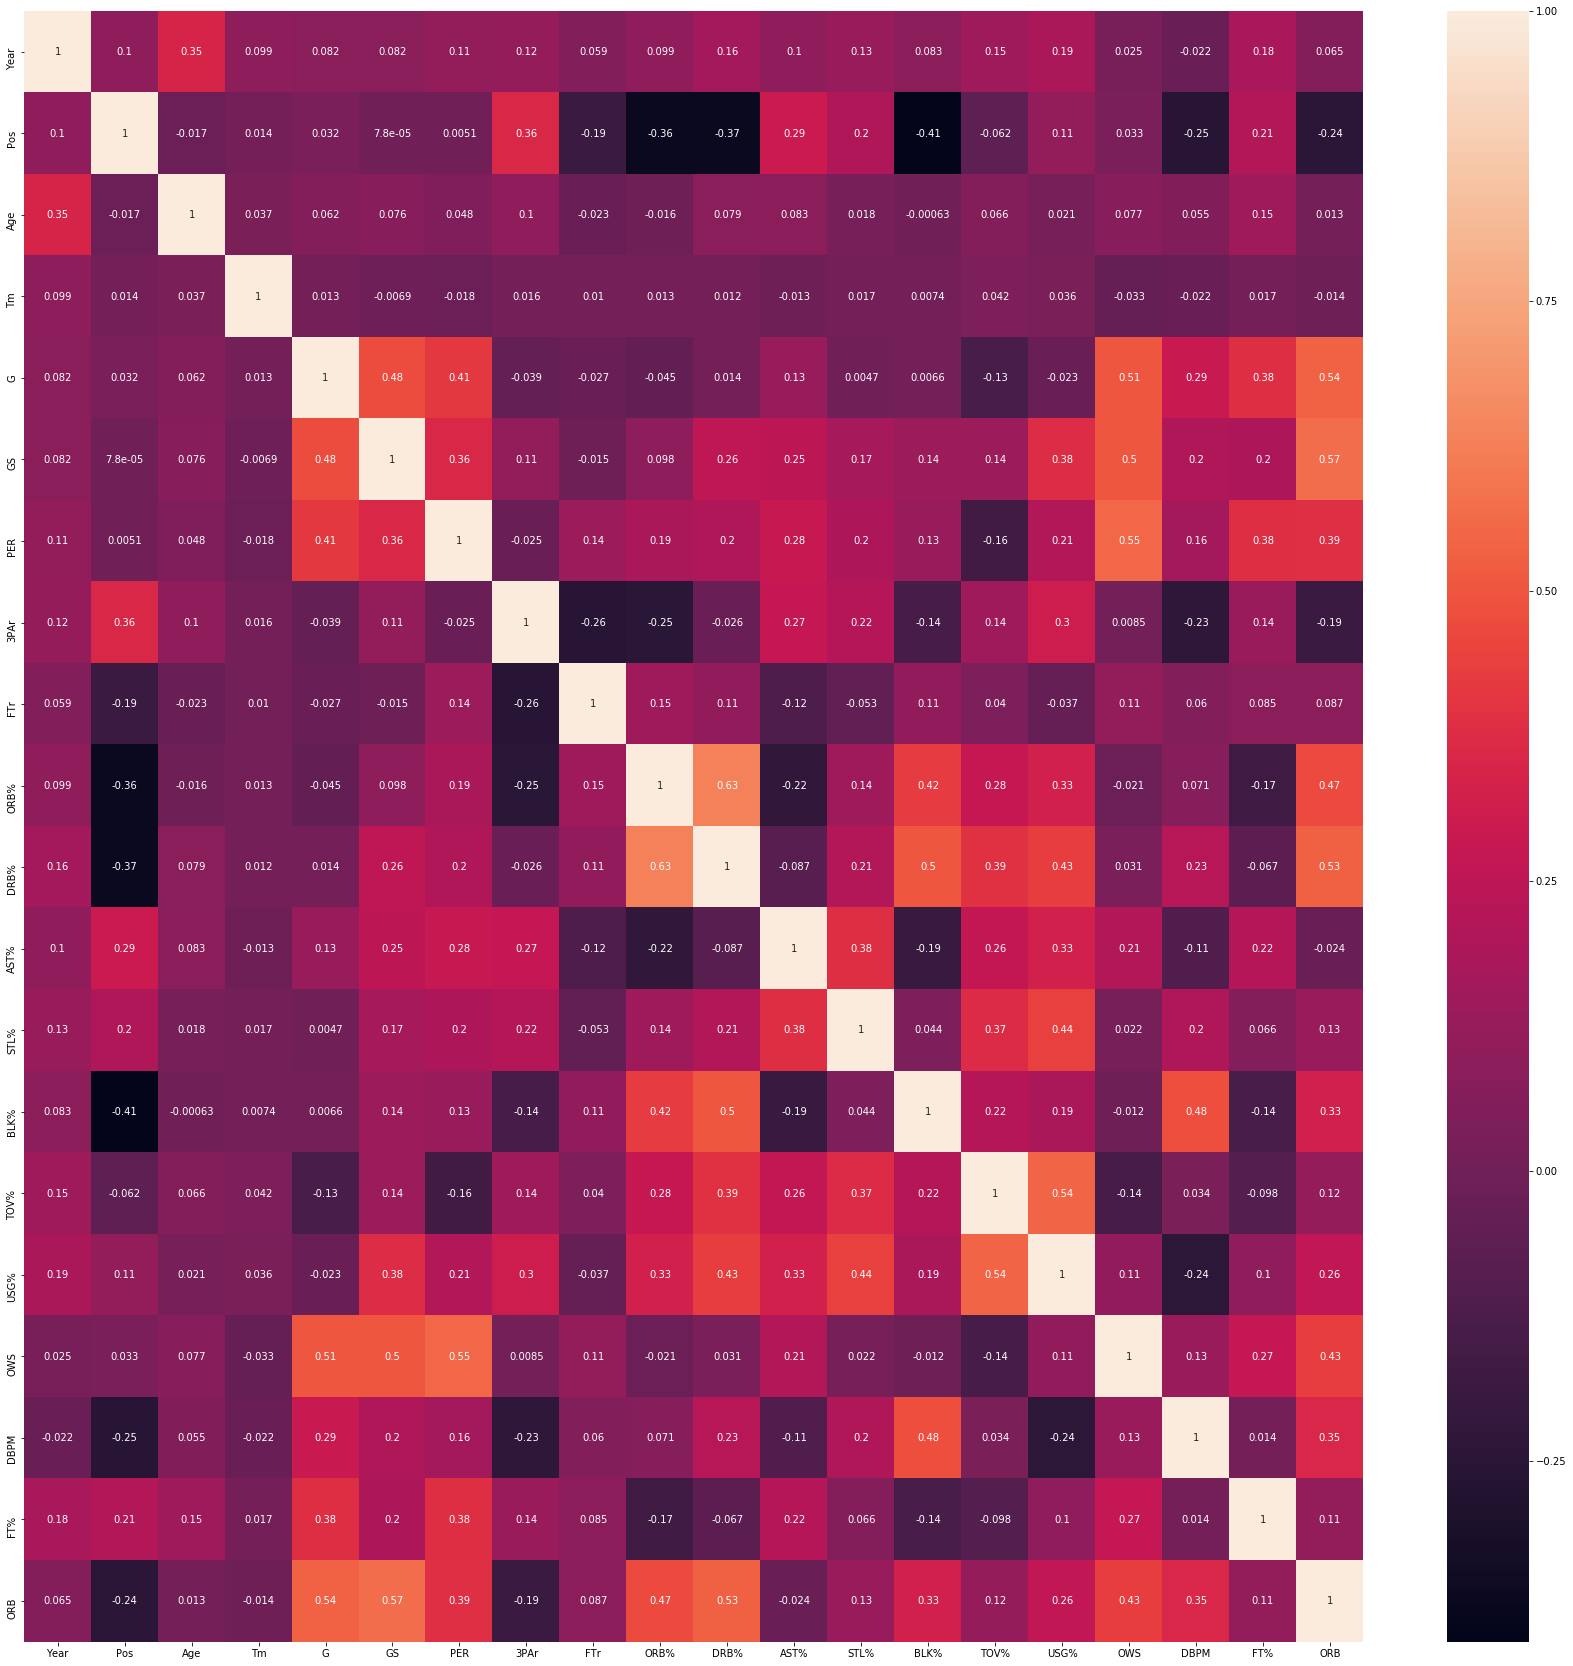

In [44]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr_matrix, annot=True)

In [45]:
df.head()

Year  Pos   Age  Tm     G   GS  PER  3PAr    FTr  ORB%  DRB%  AST%  STL%  \
0  1950.0    9  31.0  22  63.0  0.0  0.0   0.0  0.467   0.0   0.0   0.0   0.0   
1  1950.0   20  29.0  26  49.0  0.0  0.0   0.0  0.387   0.0   0.0   0.0   0.0   
2  1950.0   16  25.0  14  67.0  0.0  0.0   0.0  0.259   0.0   0.0   0.0   0.0   
3  1950.0    5  24.0  62  15.0  0.0  0.0   0.0  0.395   0.0   0.0   0.0   0.0   
4  1950.0    5  24.0  21  13.0  0.0  0.0   0.0  0.378   0.0   0.0   0.0   0.0   

   BLK%  TOV%  USG%  OWS  DBPM    FT%  ORB  
0   0.0   0.0   0.0 -0.1   0.0  0.705  0.0  
1   0.0   0.0   0.0  1.6   0.0  0.708  0.0  
2   0.0   0.0   0.0  0.9   0.0  0.698  0.0  
3   0.0   0.0   0.0 -0.5   0.0  0.559  0.0  
4   0.0   0.0   0.0 -0.5   0.0  0.548  0.0

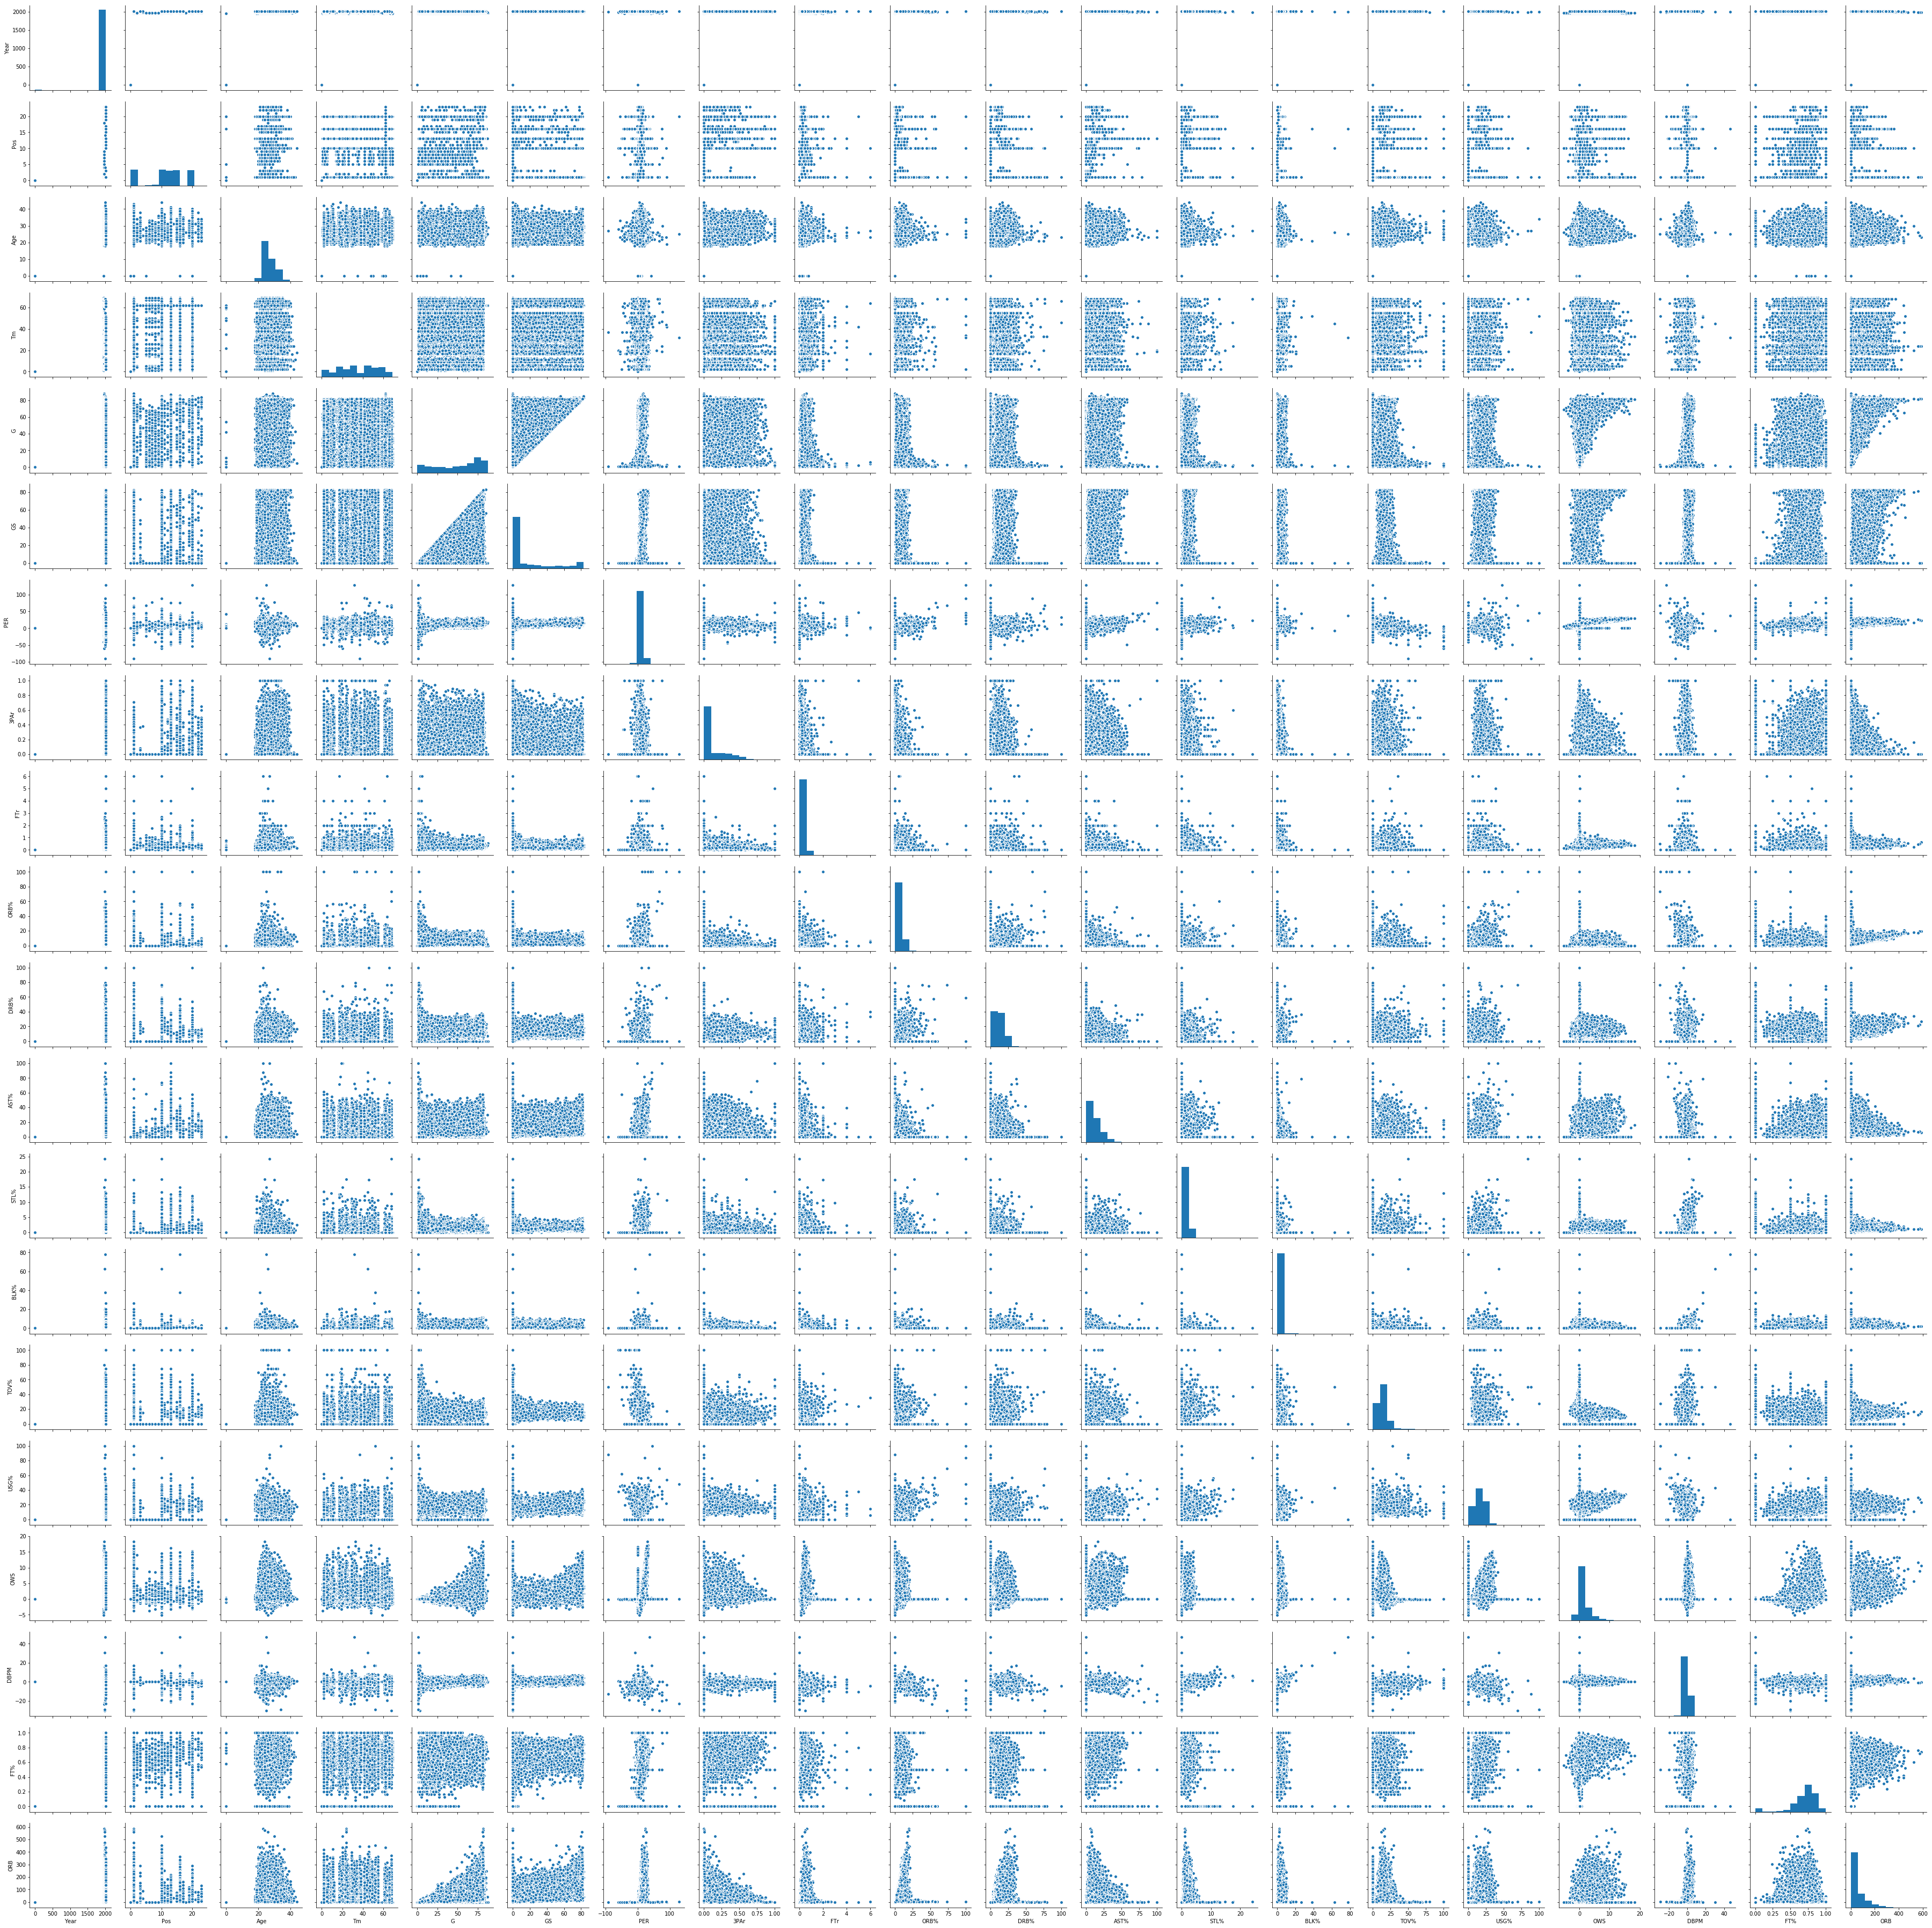

In [46]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df);

In [47]:
df.head()

Year  Pos   Age  Tm     G   GS  PER  3PAr    FTr  ORB%  DRB%  AST%  STL%  \
0  1950.0    9  31.0  22  63.0  0.0  0.0   0.0  0.467   0.0   0.0   0.0   0.0   
1  1950.0   20  29.0  26  49.0  0.0  0.0   0.0  0.387   0.0   0.0   0.0   0.0   
2  1950.0   16  25.0  14  67.0  0.0  0.0   0.0  0.259   0.0   0.0   0.0   0.0   
3  1950.0    5  24.0  62  15.0  0.0  0.0   0.0  0.395   0.0   0.0   0.0   0.0   
4  1950.0    5  24.0  21  13.0  0.0  0.0   0.0  0.378   0.0   0.0   0.0   0.0   

   BLK%  TOV%  USG%  OWS  DBPM    FT%  ORB  
0   0.0   0.0   0.0 -0.1   0.0  0.705  0.0  
1   0.0   0.0   0.0  1.6   0.0  0.708  0.0  
2   0.0   0.0   0.0  0.9   0.0  0.698  0.0  
3   0.0   0.0   0.0 -0.5   0.0  0.559  0.0  
4   0.0   0.0   0.0 -0.5   0.0  0.548  0.0

Прекрасно. Теперь у меня нормальное количество признаков и как видно, линейной зависимости нету. Оставшиеся признаки:
    - Year - год определённого сезона в котором был определённый игрок;
    - Pos - позиция на которой он играл;
    - Age - его возраст;
    - Tm - команда за которую он играл;
    - G - количество игр;
    - GS - когда началась игра (не нашла в чём измеряется, думаю в днях от начала сезона)
    - PER - рейтинг эффективности игрока;
    - 3PAr - скорость броска с длинны 3 метров;
    - FTr - скорость свободного броска;
    - ORB% - процент наступательных отскоков;
    - DRB% - защитный процент отскока;
    - AST% - процент помощи;
    - STL% - процент угона мяча;
    - BLK% - процент блокировки; 
    - TOV% - процент оборота;
    - USG% - процент обхождения; 
    - OWS - наступательные выиграшные подачи;
    - DBPM - Защитная Коробка Плюс/Минус;
    - FT% - процент свободного броска;
    - ORB - наступательные отскоки.

Я бы хотела посмотреть как зависит рейтинг эфективности игрока от всех процентных значений(ORB%, DRB% и т.д.).

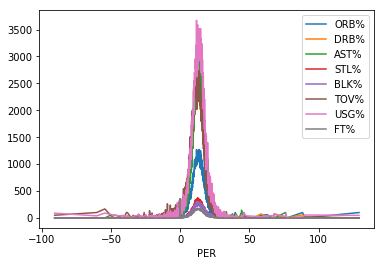

In [48]:
df[[x for x in df.columns if '%' in x] + 
   ['PER']].groupby('PER').sum().plot();

Как видно, что те, у кого процентные колонки были наибольшими имеют рейтинг эфективности игрока от 10 к 30 приблизительно.

Так же я думаю будет интересно посмотреть как зависит количетво игр в сезоне от того, какой у него рейтинг эффективности.

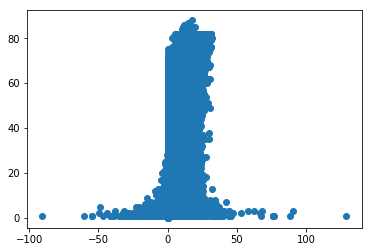

In [49]:
plt.scatter(df['PER'], df['G']);

Видно, что при PER=0 образовалась прямая, скорее всего это связано с тем, что я заменяла NaN нулями. Попробуем построить график с устранением этой проблемы.

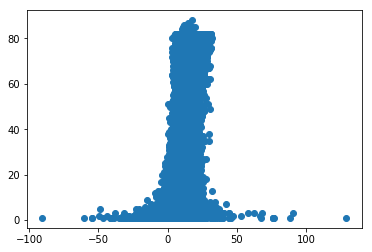

In [50]:
plt.scatter(df[df['PER']!=0]['PER'], df[df['PER']!=0]['G']);

Аналогичная ситуация, те игроки, у которых в сезоне наибольшее количество игр имеют рейтинг приблизительно 10-15.

Можно так же посмотреть какой средний возраст людей в определённой команде.

In [51]:
tmp_df = df[['Age', 'Tm']]
tmp_df = tmp_df[tmp_df['Age']!=0]

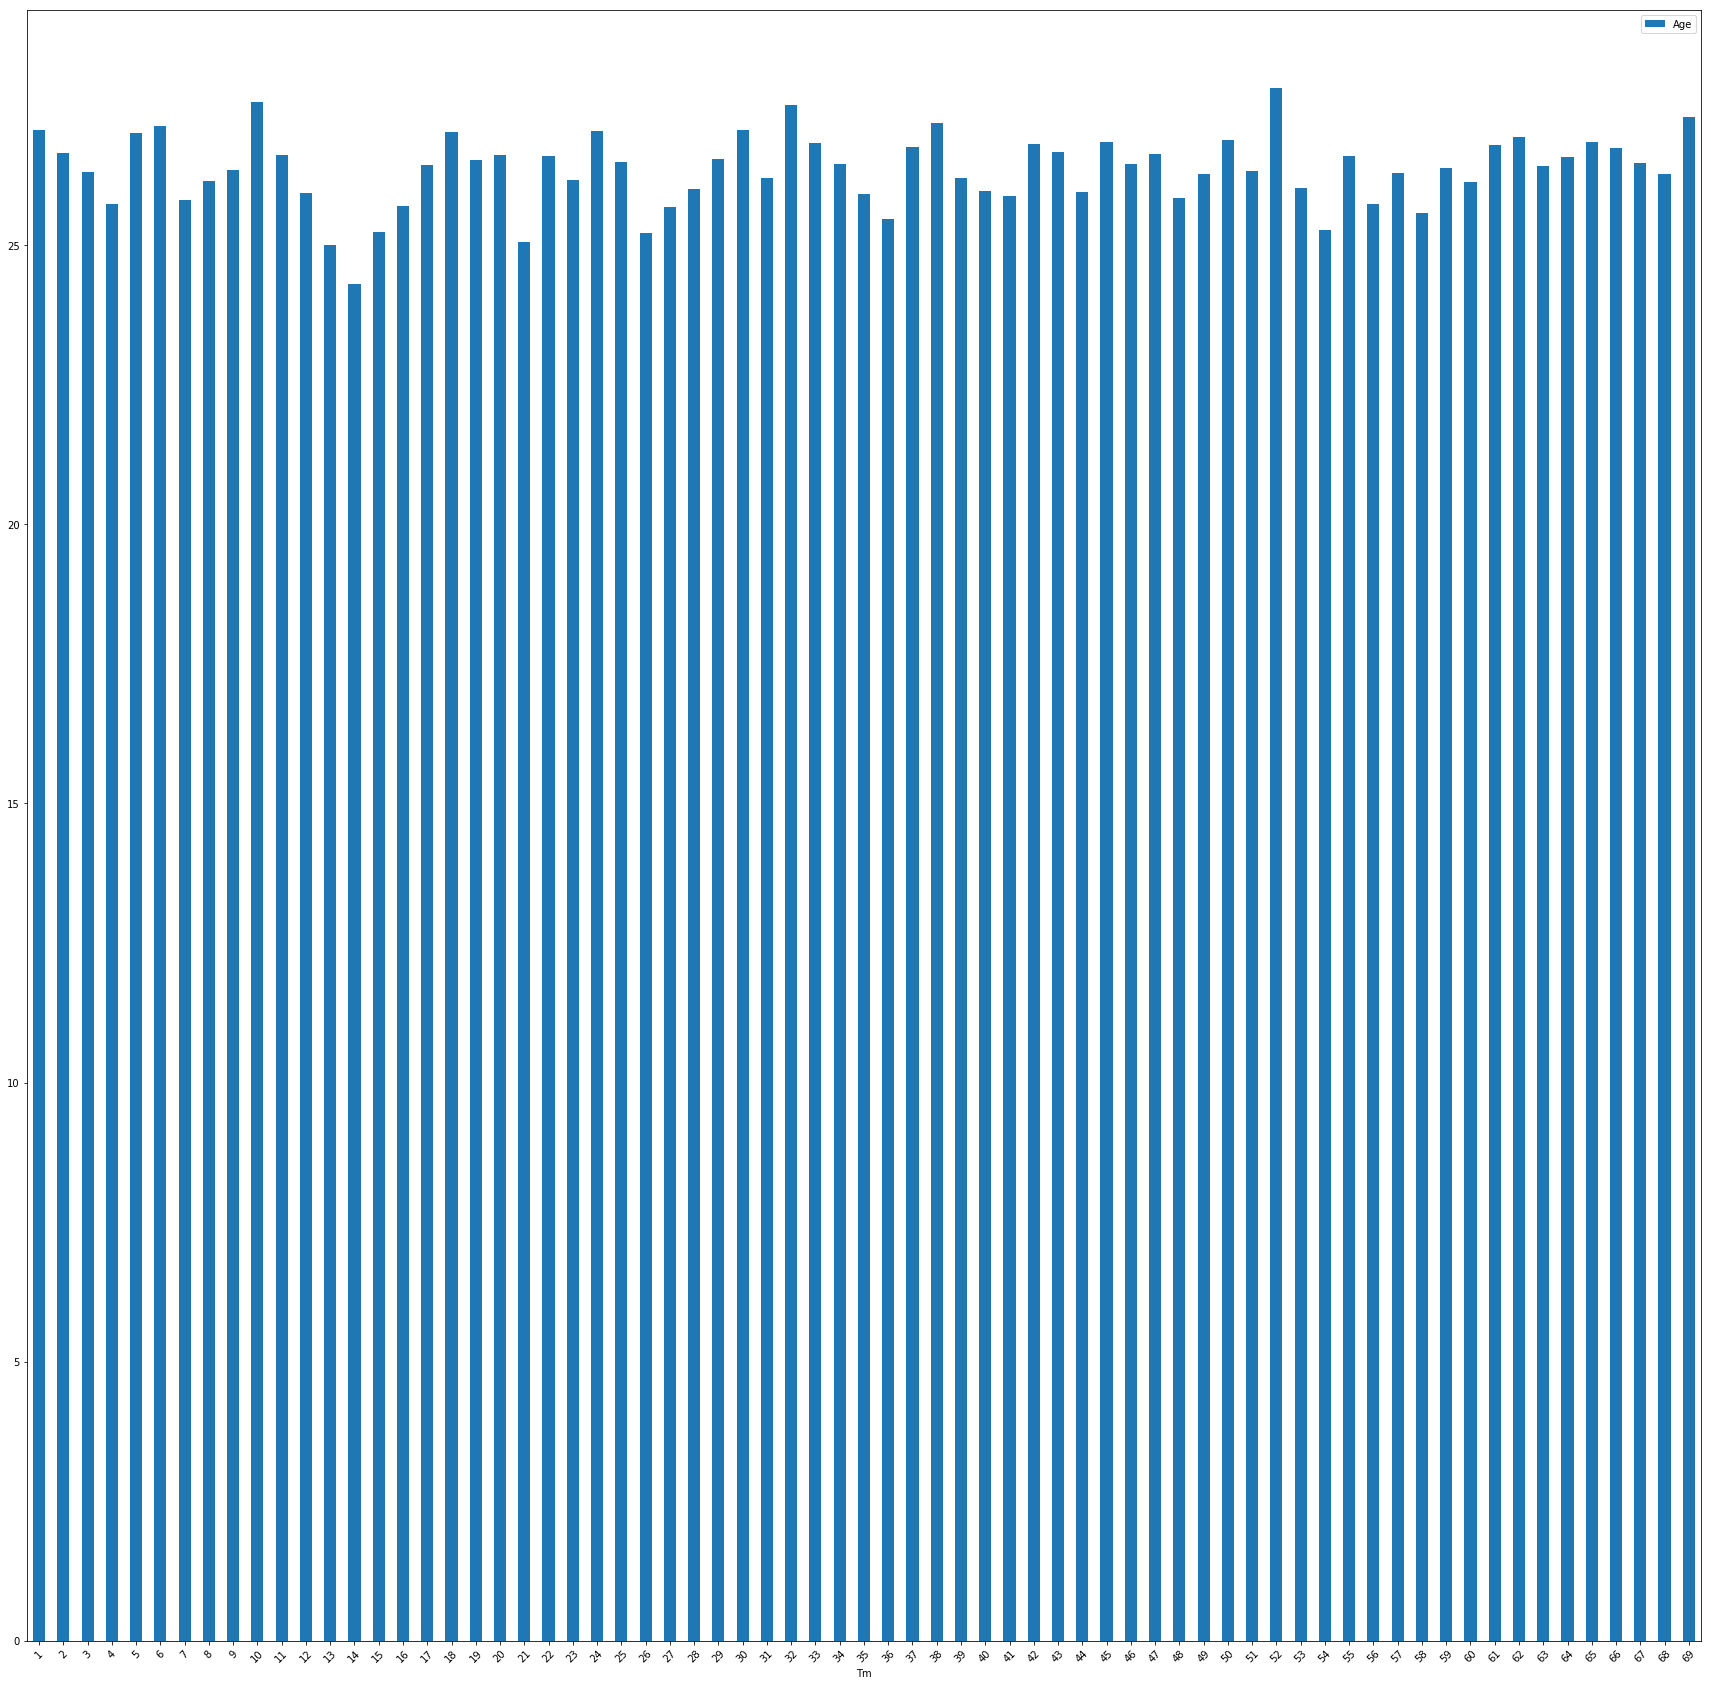

In [52]:
tmp_df.groupby('Tm').mean().plot(kind='bar', figsize=(30, 30), rot=45);

С этого графика видно, что если брать в среднем, то в командах нету людей моложе 23 лет, или старше 27. Посмотрим же на эффективности игроков в определённой команде.

In [53]:
tmp_df = df[['PER', 'Tm']]
tmp_df = tmp_df[tmp_df['PER']!=0]

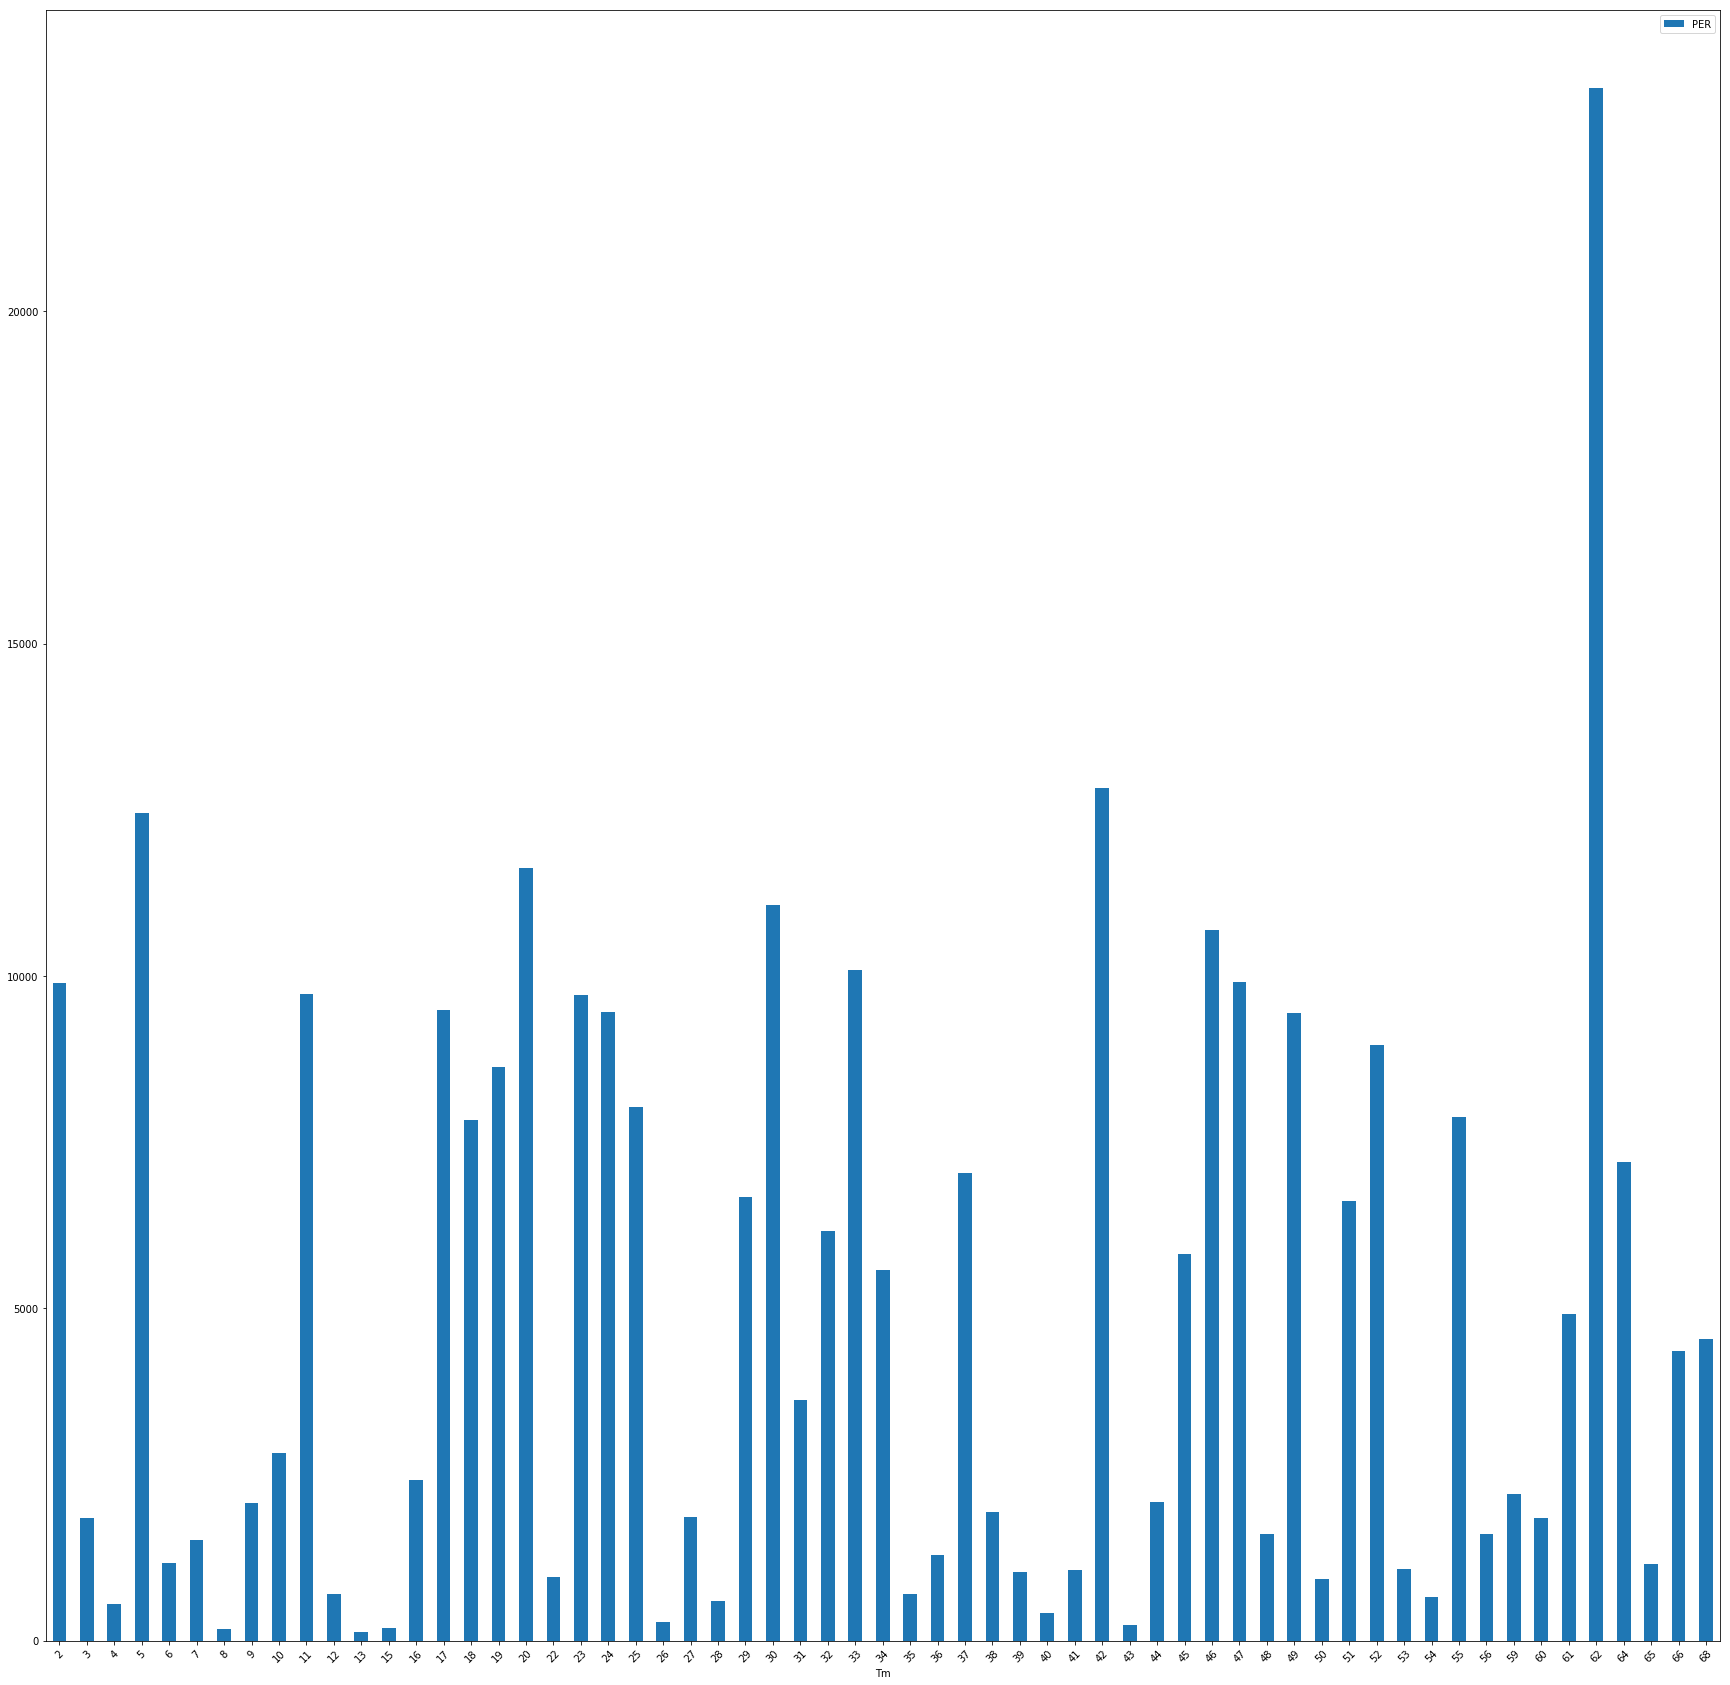

In [54]:
tmp_df.groupby('Tm').sum().plot(kind='bar', figsize=(30, 30), rot=45);

Здесь очень сильно видна разница между значениями. Это означает, что в какой-то команде рейтинг игроков намного лучше, чем в другой. Это может быть связано с тем, что в какой-то команде намного больше людей. Проверим и это.

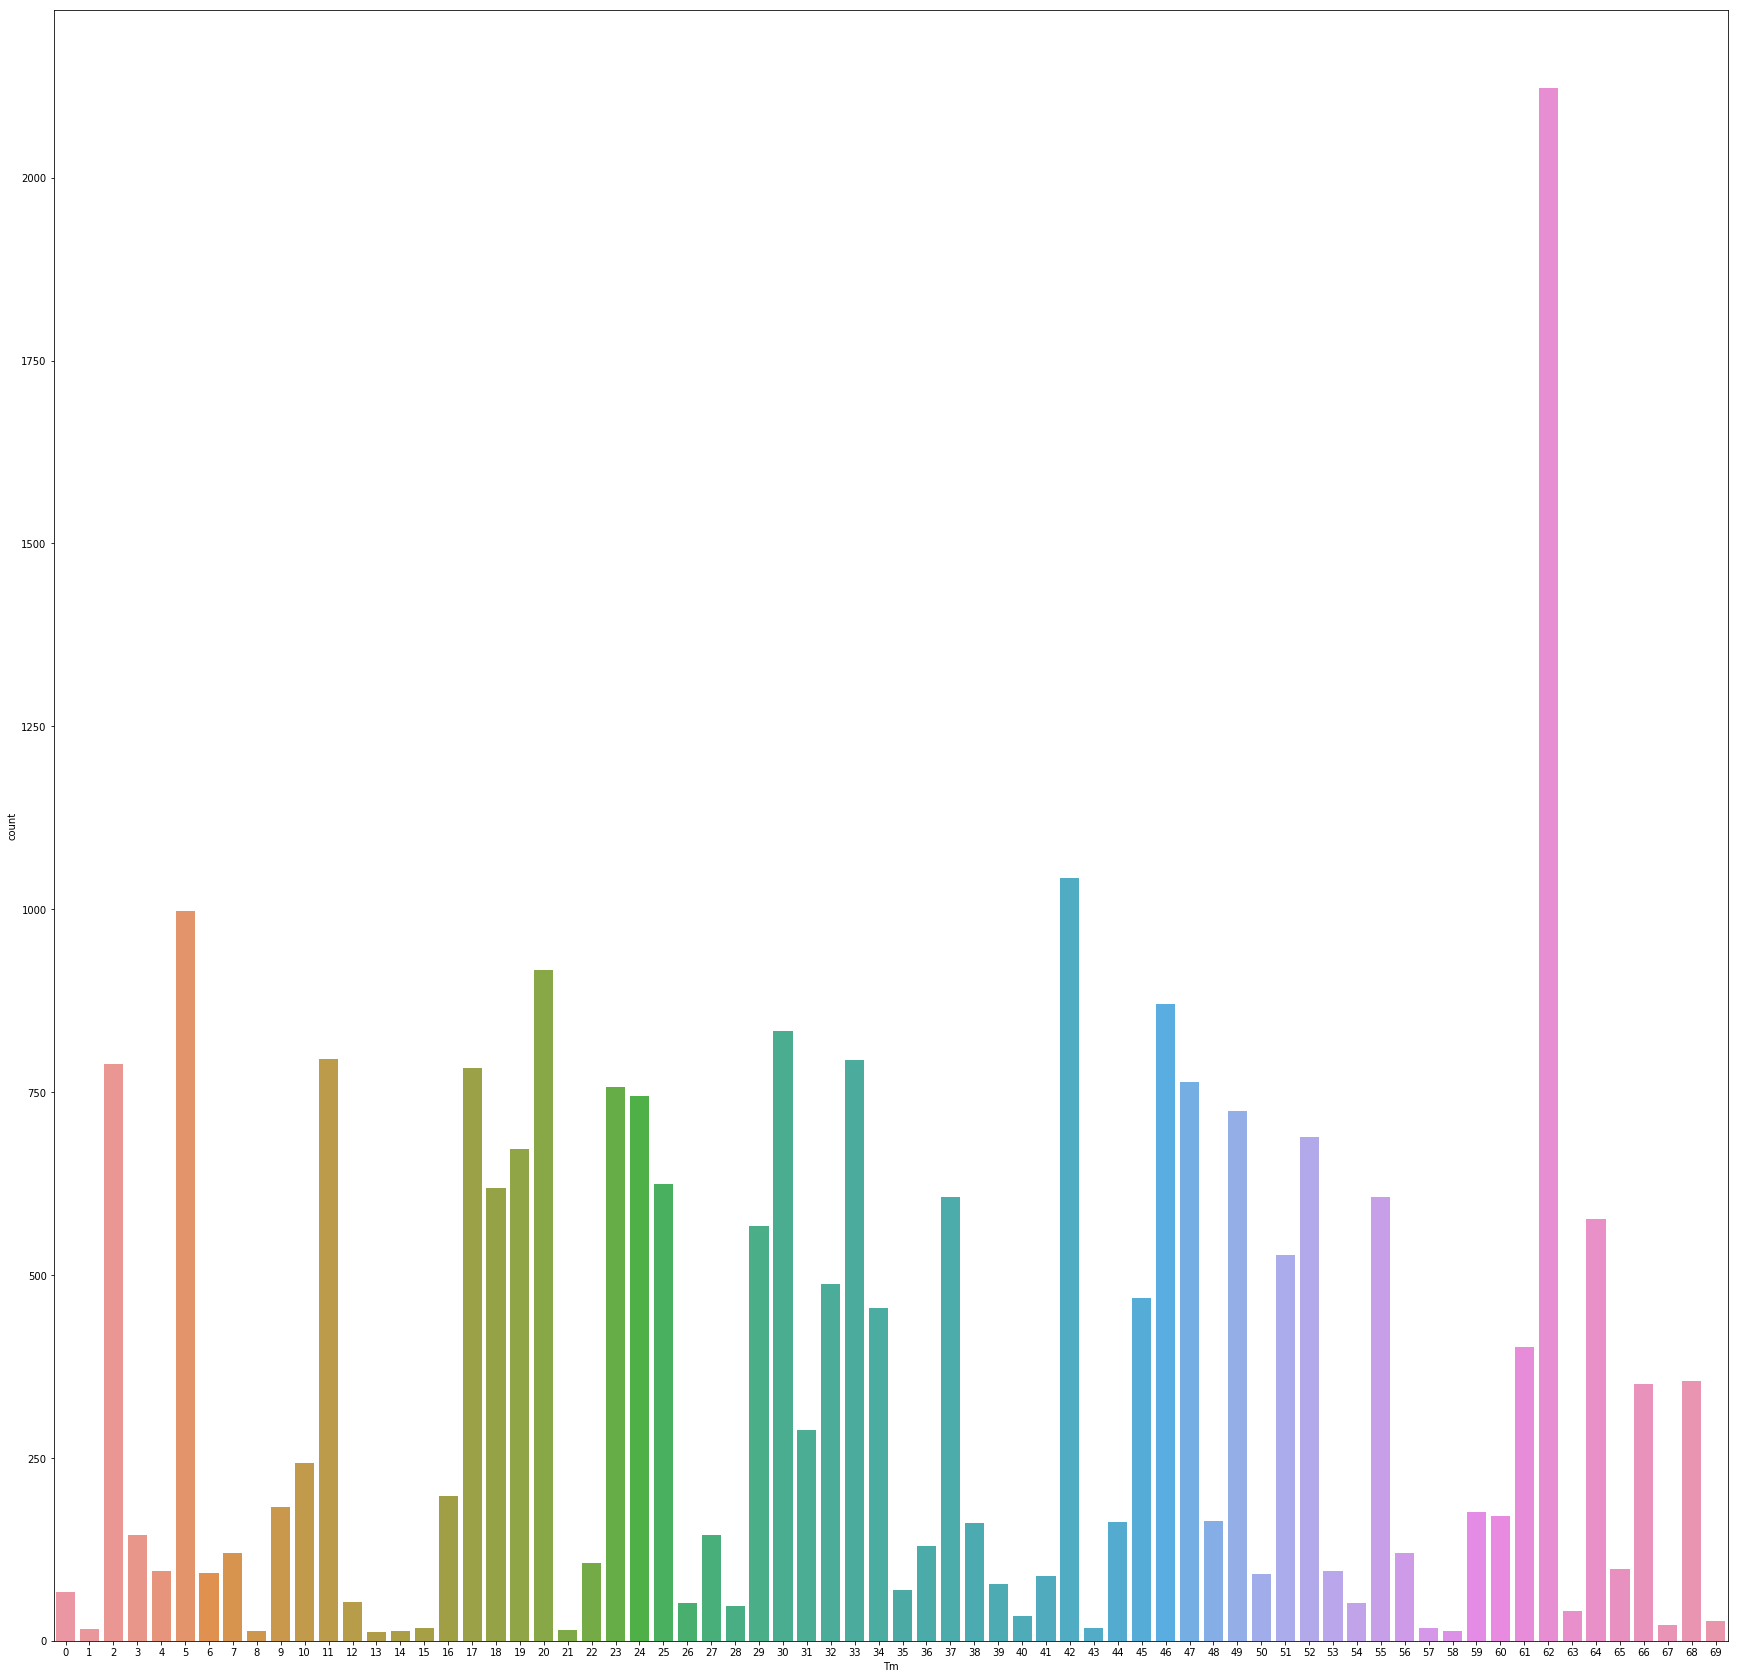

In [55]:
plt.figure(figsize = (30, 30))
sns.countplot(x = 'Tm', data=df)

Ну да, всё, как я и ожидала. В некоторых командах гараздо больше людей, чем в других. Это может означать, что команда часто меняла игроков, к примеру, может старых увольняла и нанимала новых, потому что я сильно сомневаюсь, что в 62 команде платят зарплату почти 2000 игроков. Посмотрим какое среднее значение эффективности игроков каждой команды.

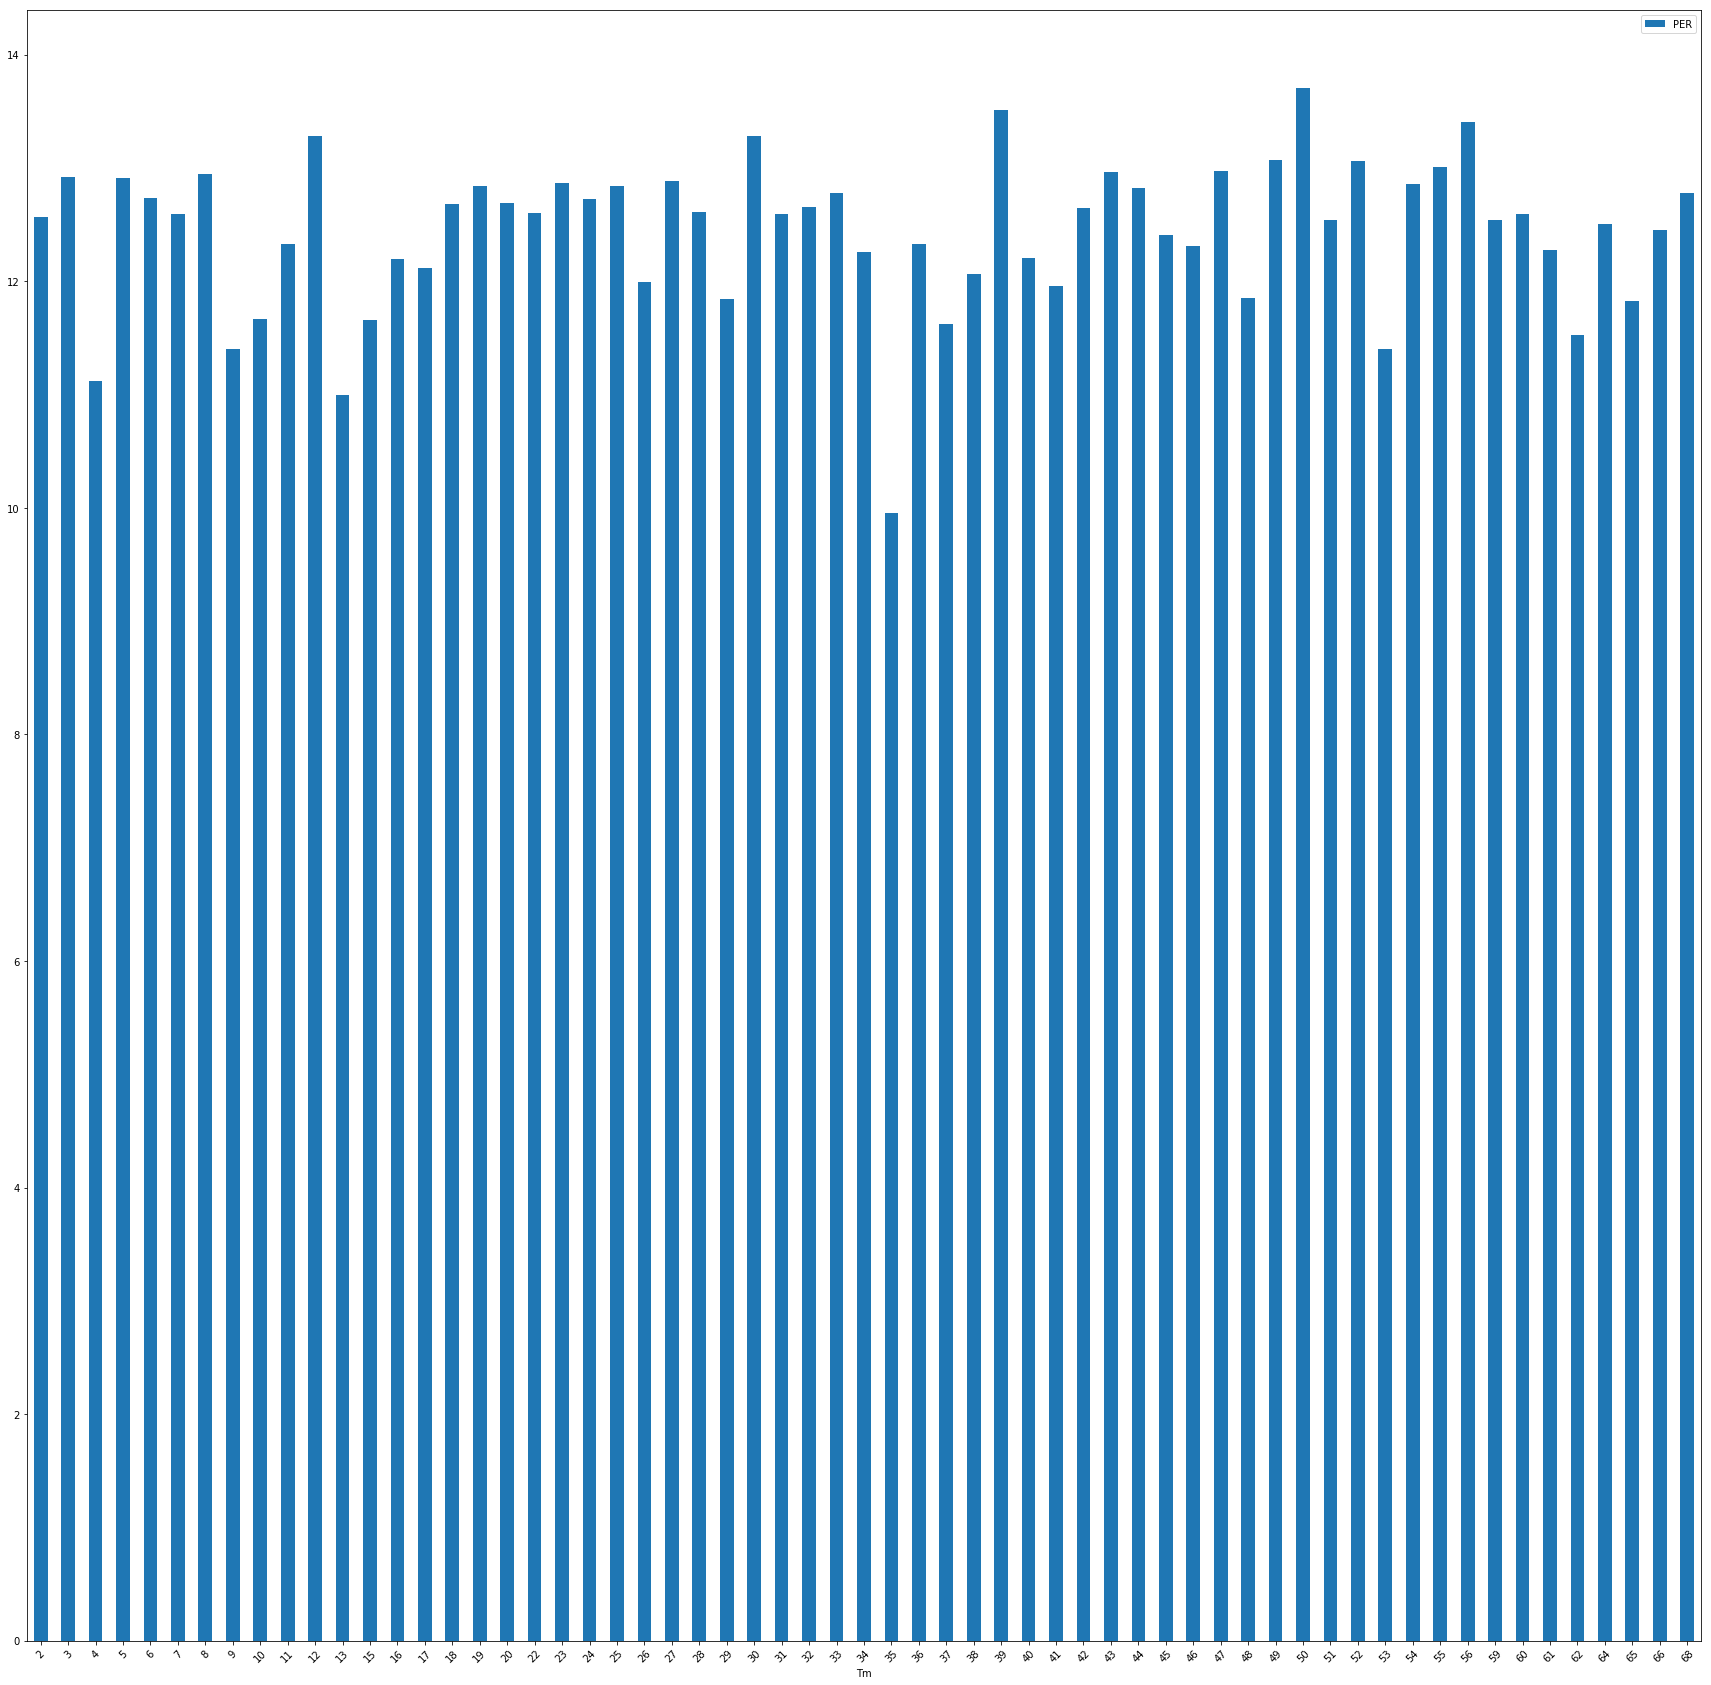

In [56]:
tmp_df.groupby('Tm').mean().plot(kind='bar', figsize=(30, 30), rot=45);

Ну как видно, в среденем рейтенг игроков одинаковый во всех командах. Только в 35 команде наихудший показатель. И ссылаясь на верхний график могу сказать, что у них не наименьшее количество игроков, так что скорее всего их игроки просто хуже, чем в остальных командах.

Можно посмотреть сколько игр было сыграно каждой командой. 

In [57]:
tmp_df = df[['G', 'Tm']]
tmp_df = tmp_df[tmp_df['G']!=0]

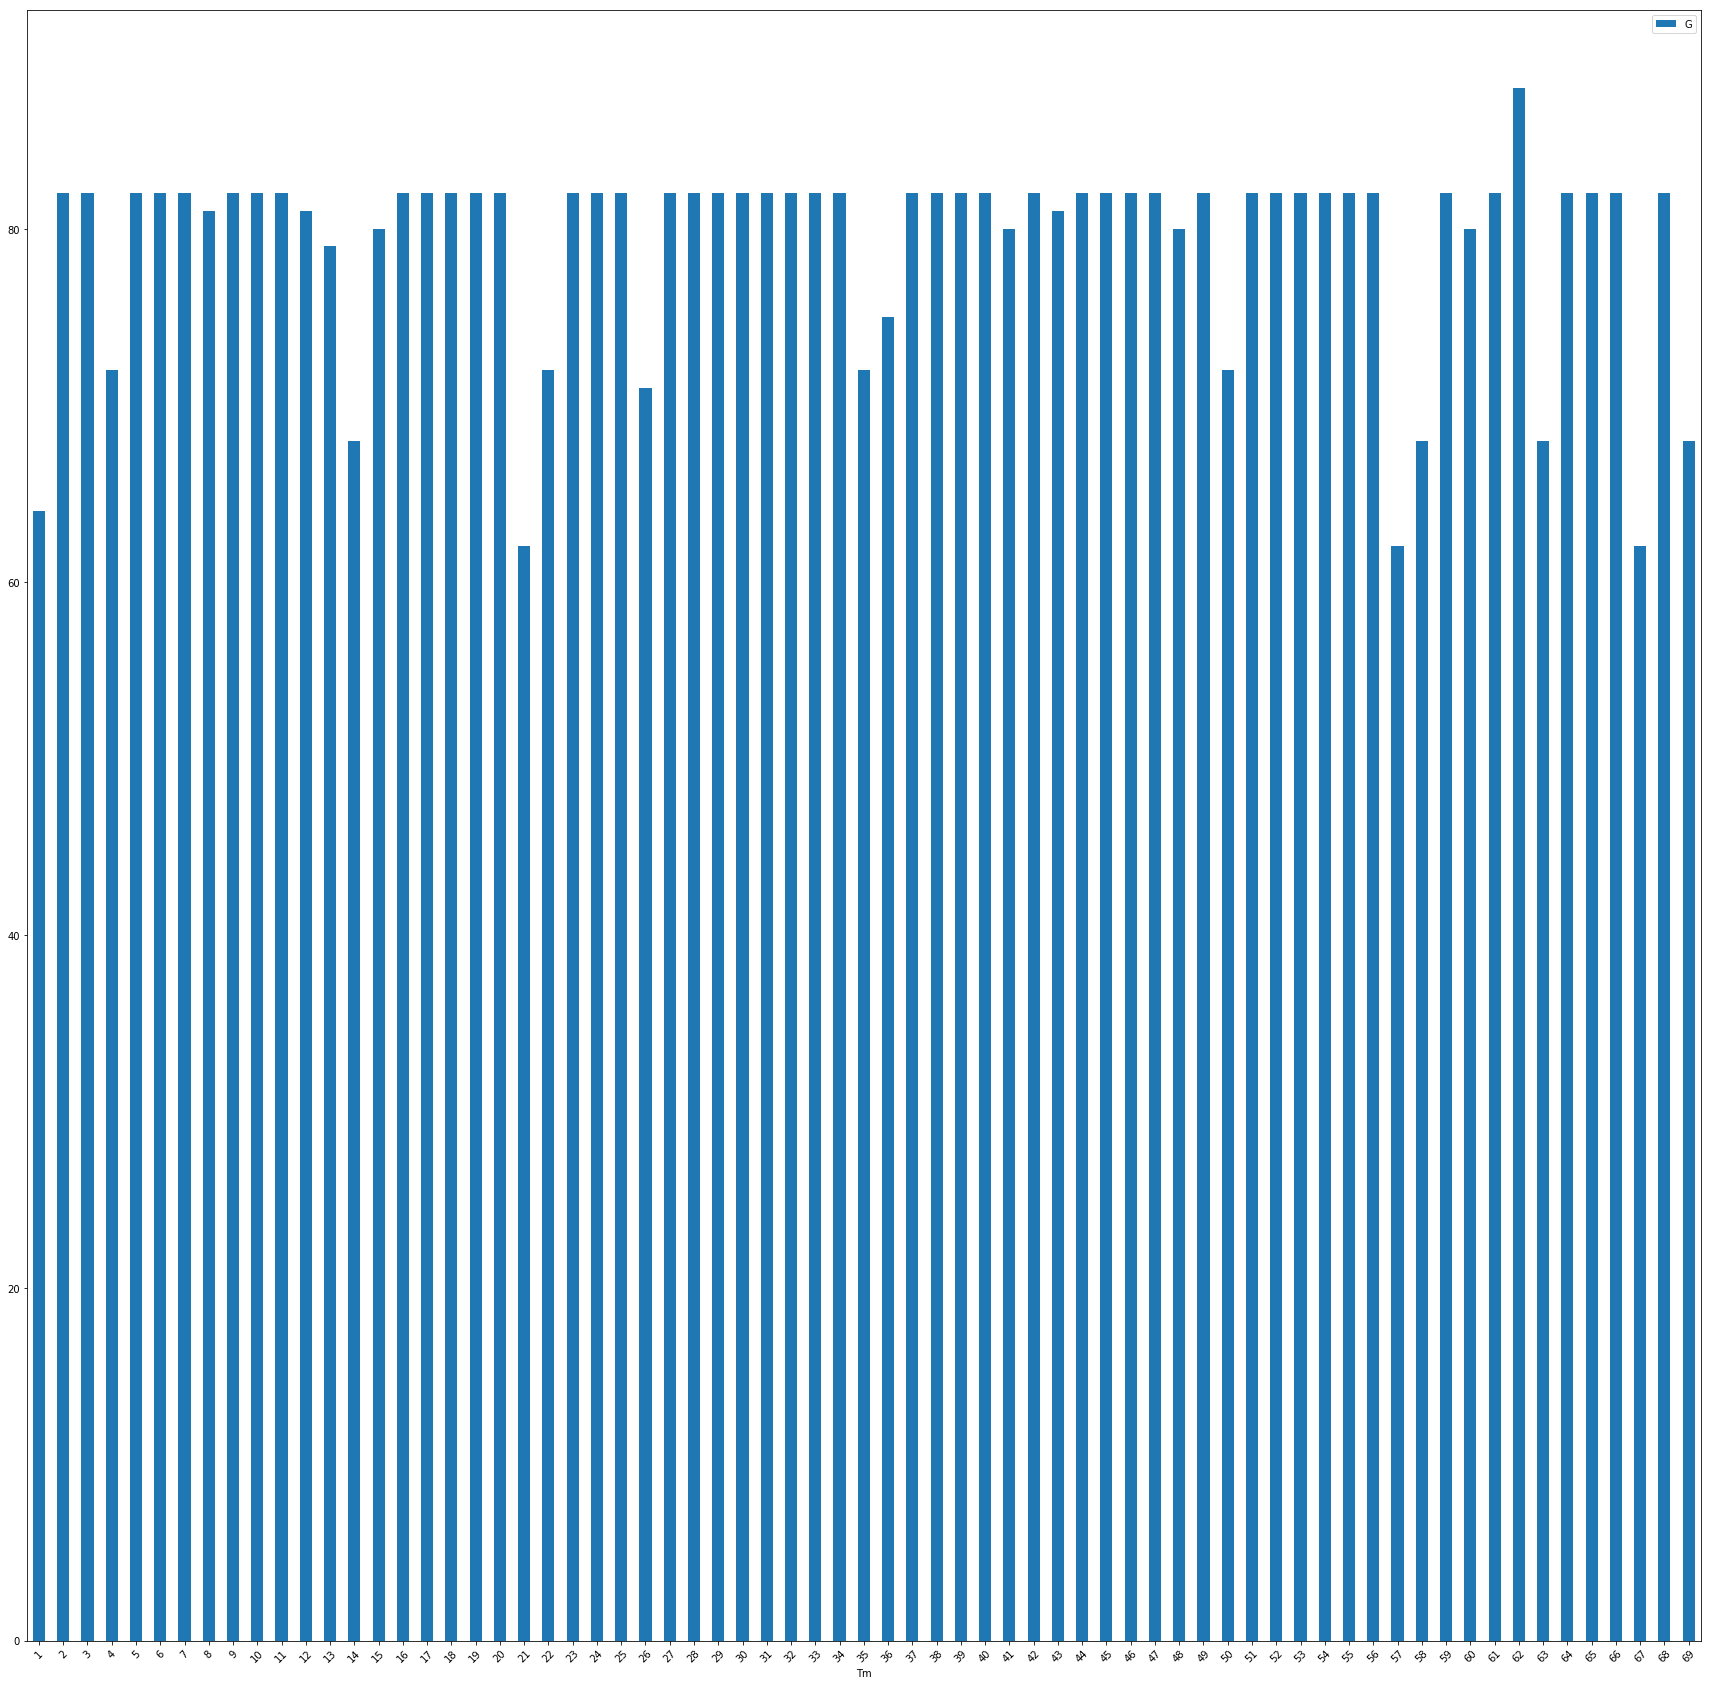

In [58]:
tmp_df.groupby('Tm').max().plot(kind='bar', figsize=(30, 30), rot=45);

С этого графика видно, что наибольше игр сыграла команда №62. А как мы помним это именно та команда в которой было наибольше играков за все сезоны.

После небольшого визуального анализа можно подвести итоги.
В команде TOT, если сумировать, наилучший показатель эффективности игроков. Но это связано с тем, что в ней чаще всего менялись игроки. Это так же можно подтвердить тем фактом, что в первом наборе данных было много людей, которые не проработали и года в этой сфере. В то же время этой командой было сыграно наибольшее количество игр. Можно сделать такой вывод, что возможно баскетбол сложный спорт и для того, что бы пробиться в первые ряды, в команду нужно принимать навых и новых людей, у которых будет больше сил, чем у тех, которые уже отыграли насколько игр. Или же это сложный спорт где легко травмировать и тех, кто уже травмирован увольняли и на их место нанимали новых людей.

В остальных командах приблизительно одинаковый рейтинг эффективности игроков: от 10 до 30. Такой рейтинг у тех игроков у, которых наилучшие процентные показатели. Так же можно сказать, что у тех игроков у которых рейтинг от 10 до 15 сыграно наибольшее количество игр. Тоесть, что ожидаемо, тех, кто играет лучше на игровое поле выпускают чаще. 

В среднем в баскетболе игроки проводят около 15 лет. Начинают они свою карьеру приблизительно в 24 года. В основном это люди ростом около 2 метров и весом около 100 кг. Больше всего людей с такими параметрами находится на позициях G, F, хотя на остальных они тоже могут работать. 